## Linear Regression

Linear regression is a type of supervised machine learning algorithm that computes the linear relationship between the dependent variable and one or more independent features by fitting a linear equation to observed data.

### Part 1

(a) Notice that we used 100 epochs which was waste of time and we could have stopped earlier since after about epoch 55 or so, the loss is not getting lower significantly. Modify the above code so that if the change in loss is less than $1\%$, you exit the iterations.

In [432]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import random

In [433]:
# Load the Iris dataset into a DataFrame
df = pd.read_csv("iris_dataset.csv")

In [434]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [435]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [436]:
# Select only the first 50 rows and the two columns 'sepal_length' and 'sepal_width'
df = df.iloc[:50][["sepal_length", "sepal_width"]]
df.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


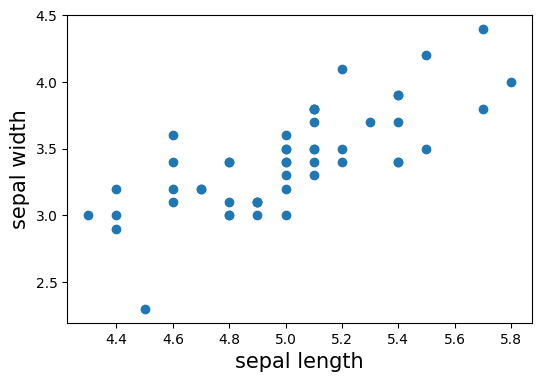

In [437]:
plt.figure(figsize = (6, 4))
plt.scatter(df['sepal_length'], df['sepal_width'])
plt.xlabel("sepal length", fontsize = 15)
plt.ylabel("sepal width", fontsize = 15);

In [438]:
# Compute and print the covariance matrix of the selected columns
print("Covariance:")
print(df.cov())
print()

Covariance:
              sepal_length  sepal_width
sepal_length      0.124249     0.100298
sepal_width       0.100298     0.145180



In [439]:
# Compute and print the correlation matrix of the selected columns
print("Correlation:")
print(df.corr())

Correlation:
              sepal_length  sepal_width
sepal_length       1.00000      0.74678
sepal_width        0.74678      1.00000


In [440]:
# Define a custom linear regression class
class MyLinReg(object):
    def __init__(self, activation_function):

      # Initialize the model with a specified activation function
        self.activation_function = activation_function

    def fit(self, X, y, alpha = 0.001, epochs = 10):
        self.theta = np.random.rand(X.shape[1] + 1)
        self.errors = []
        n = X.shape[0]

      # Perform training over the given number of epochs
        for _ in range(epochs):
            errors = 0
            sum_1 = 0
            sum_2 = 0

            # Update weights using gradient descent
            for xi, yi in zip(X, y):
                sum_1 += (self.predict(xi) - yi)*xi
                sum_2 += (self.predict(xi) - yi)
                errors += ((self.predict(xi) - yi)**2)

            # Update weights using gradients and learning rate alpha
            self.theta[:-1] -= 2*alpha*sum_1/n
            self.theta[-1] -= 2*alpha*sum_2/n
            self.errors.append(errors/n)

            # Early stopping condition if error reduction is very small
            if len(self.errors)>=2 and ((self.errors[-2]-self.errors[-1])/self.errors[-2]<0.01):
                break

        return self
   # Predict method to make predictions based on input features
    def predict(self, X):
        weighted_sum = np.dot(X, self.theta[:-1]) + self.theta[-1]
        return self.activation_function(weighted_sum)

In [441]:
X = df[['sepal_length']].to_numpy()

In [442]:
X

array([[5.1],
       [4.9],
       [4.7],
       [4.6],
       [5. ],
       [5.4],
       [4.6],
       [5. ],
       [4.4],
       [4.9],
       [5.4],
       [4.8],
       [4.8],
       [4.3],
       [5.8],
       [5.7],
       [5.4],
       [5.1],
       [5.7],
       [5.1],
       [5.4],
       [5.1],
       [4.6],
       [5.1],
       [4.8],
       [5. ],
       [5. ],
       [5.2],
       [5.2],
       [4.7],
       [4.8],
       [5.4],
       [5.2],
       [5.5],
       [4.9],
       [5. ],
       [5.5],
       [4.9],
       [4.4],
       [5.1],
       [5. ],
       [4.5],
       [4.4],
       [5. ],
       [5.1],
       [4.8],
       [5.1],
       [4.6],
       [5.3],
       [5. ]])

In [443]:
y = df['sepal_width'].to_numpy()

In [444]:
y

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3])

In [445]:
# Define an identity activation function
def identity_function(z):
    return z

In [446]:
# We instantiate an instance of MyLinReg class with identity activation function

model = MyLinReg(identity_function)

# Train the model with the feature matrix X and target vector y

model.fit(X, y)

In [447]:
# Make predictions using the trained model
model.predict(X)

array([4.24349003, 4.10231841, 3.96114679, 3.89056098, 4.17290422,
       4.45524747, 3.89056098, 4.17290422, 3.74938935, 4.10231841,
       4.45524747, 4.0317326 , 4.0317326 , 3.67880354, 4.73759071,
       4.6670049 , 4.45524747, 4.24349003, 4.6670049 , 4.24349003,
       4.45524747, 4.24349003, 3.89056098, 4.24349003, 4.0317326 ,
       4.17290422, 4.17290422, 4.31407584, 4.31407584, 3.96114679,
       4.0317326 , 4.45524747, 4.31407584, 4.52583328, 4.10231841,
       4.17290422, 4.52583328, 4.10231841, 3.74938935, 4.24349003,
       4.17290422, 3.81997516, 3.74938935, 4.17290422, 4.24349003,
       4.0317326 , 4.24349003, 3.89056098, 4.38466166, 4.17290422])

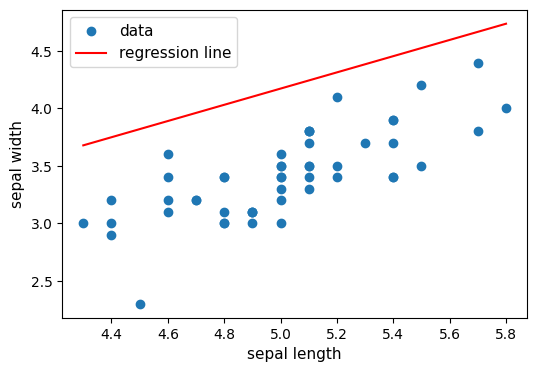

In [448]:
# Define the domain for plotting the regression line
domain_x = np.linspace(np.min(X), np.max(X), 5)
domain_y = model.predict(domain_x.reshape(-1,1))


# Create a scatter plot of the data and plot the regression line
plt.figure(figsize = (6, 4))

plt.scatter(X, y, label = "data")
plt.plot(domain_x, domain_y, color="red", label ="regression line")
plt.xlabel("sepal length", fontsize = 11)
plt.ylabel("sepal width", fontsize = 11)
plt.legend(fontsize=11);

In [449]:
domain_x

array([4.3  , 4.675, 5.05 , 5.425, 5.8  ])

In [450]:
domain_y

array([3.67880354, 3.94350033, 4.20819713, 4.47289392, 4.73759071])

In [451]:
domain_x.reshape(-1,1)

array([[4.3  ],
       [4.675],
       [5.05 ],
       [5.425],
       [5.8  ]])

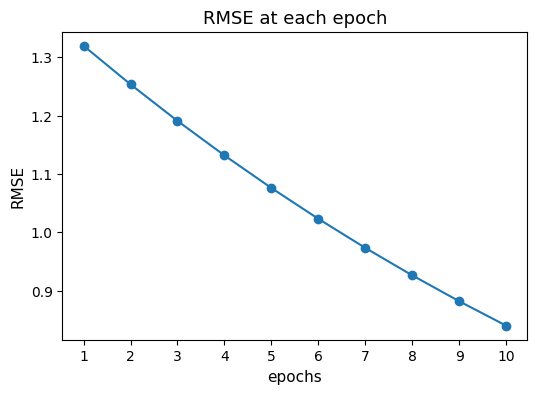

In [452]:
# Plot the RMSE (Root Mean Squared Error) at each epoch to show the training progress
plt.figure(figsize = (6, 4))

plt.plot(range(1, len(model.errors) + 1),
         np.sqrt(model.errors),
         marker = "o")
plt.xlabel("epochs", fontsize = 11)
plt.ylabel("RMSE", fontsize = 11)
plt.xticks(range(1, len(model.errors) + 1))
plt.title("RMSE at each epoch", fontsize = 13);

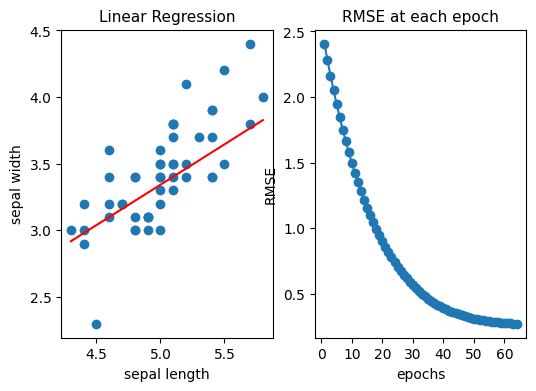

In [453]:
# Retrain the model with more epochs and a higher learning rate
model = MyLinReg(identity_function)
model.fit(X, y, alpha = 0.001, epochs = 100)


# Define the domain for the regression line (only two points for a straight line)
domain_x = np.linspace(np.min(X), np.max(X), 2)
domain_y = model.predict(domain_x.reshape(-1, 1))


# Create two subplots: one for the regression line and one for RMSE over epochs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6,4))

# Plot the data points and the regression line on the first subplot
ax1.scatter(X, y)
ax1.plot(domain_x, domain_y, color = "red")
ax1.set_xlabel("sepal length")
ax1.set_ylabel("sepal width")
ax1.set_title("Linear Regression", fontsize = 11)


# Plot the RMSE over epochs on the second subplot
ax2.plot(range(1, len(model.errors) + 1),
         np.sqrt(model.errors),
         marker = "o")
ax2.set_xlabel("epochs")
ax2.set_ylabel("RMSE")
ax2.set_xticks(range(0, len(model.errors) + 1, 10))
ax2.set_title("RMSE at each epoch", fontsize = 11);

In [454]:
# Print the number of iterations (epochs) the model took to converge
print("number of iterations are:",len(model.errors))

number of iterations are: 64


### Observation
Upon reducing the number of epochs, we observe that the model likely reaches a good enough fit within these 10 epochs due to the early stopping mechanism. This adjustment optimizes computational efficiency without compromising the model's performance, as further training beyond a certain point provides diminishing returns in terms of reducing the loss.

(b) The above class uses batch gradient descent to find the minimum of the loss function. Modify the original code and use the stochastic gradient descent instead. Iterate over many iterations and see how the RMSE changes. The graph of RMSE for the batch gradient descent is smooth and decreasing as the number of iterations increases. What can you say about the graph of RMSE when the stochastic gradient descent is used?  

In [455]:
# Define a linear regression class that uses stochastic gradient descent (SGD)
class MyLinReg(object):
    def __init__(self, activation_function):
        # Initialize with the provided activation function
        self.activation_function = activation_function

    # Method to train the model using stochastic gradient descent
    def stochastic_gd_fit(self, X, y, alpha=0.001, epochs=10):
        self.errors = []
        self.theta = np.random.rand(X.shape[1] + 1)
        n = X.shape[0]

        # Iterate over the given number of epochs
        for epoch in range(epochs):
            epoch_errors = 0  # Initialize error for this epoch
            for i in range(n):
                # Randomly select a training example for stochastic gradient descent
                rand_index = np.random.randint(n)
                X_rand = X[rand_index:rand_index + 1]  # Select random feature
                y_rand = y[rand_index:rand_index + 1]  # Select random target

                # Compute the prediction error
                error = self.predict(X_rand) - y_rand

                # Compute the gradients for weights and bias
                grad_w = error * X_rand
                grad_b = error

                # Update the weights and bias using the gradients
                self.theta[:-1] -= 2 * alpha * grad_w[0] / n
                self.theta[-1] -= 2 * alpha * grad_b / n

                # Accumulate the squared error for this epoch
                epoch_errors += error**2

            # Append the mean squared error for the current epoch
            self.errors.append(epoch_errors / n)


    # Method to predict output for input X
    def predict(self, X):
        # Perform a linear combination of the input features and weights (theta)
        weighted_sum = np.dot(X, self.theta[:-1]) + self.theta[-1]
        # Apply the activation function to the weighted sum
        return self.activation_function(weighted_sum)

# Define an identity activation function (i.e., linear activation)
def identity_function(z):
    return z

In [456]:
# Prepare the feature matrix (X) and target vector (y)
X = df[['sepal_length']].to_numpy()  # Feature: sepal length
y = df['sepal_width'].to_numpy()  # Target: sepal width

# Instantiate the linear regression model with the identity function
model = MyLinReg(identity_function)

# Train the model using stochastic gradient descent
model.stochastic_gd_fit(X, y, alpha=0.001, epochs=100)

<ipython-input-455-09b630c23d88>:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.theta[-1] -= 2 * alpha * grad_b / n


Text(0.5, 1.0, 'RMSE at each epoch (SGD)')

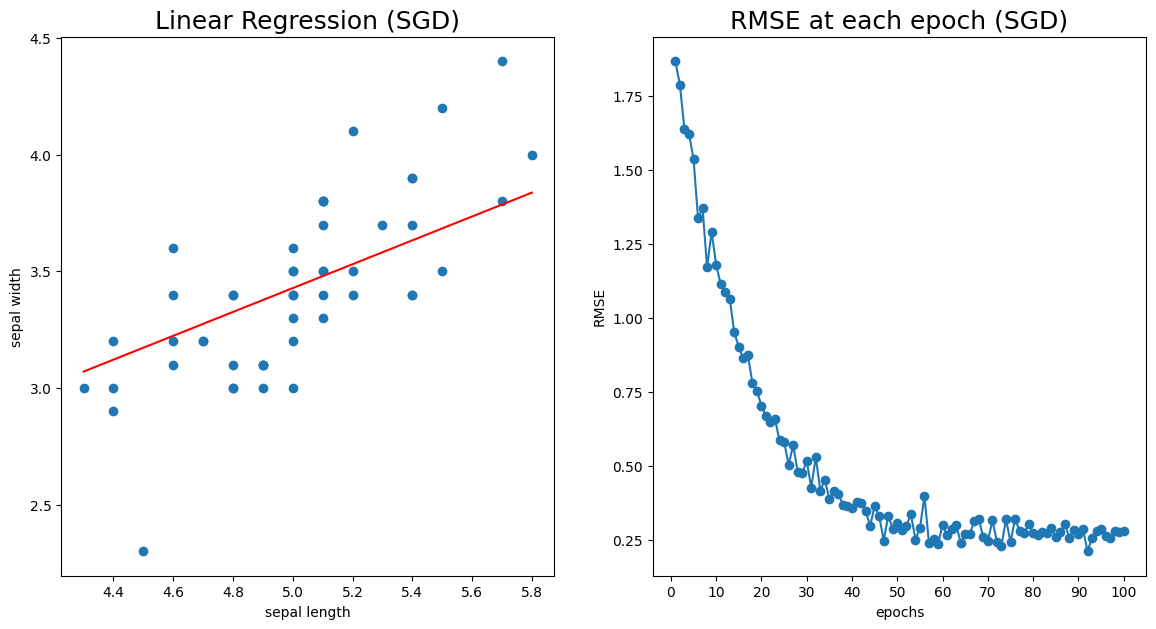

In [457]:
# Define the domain for plotting the regression line
domain_x = np.linspace(np.min(X), np.max(X), 2)  # Generate two points for a straight line
domain_y = model.predict(domain_x.reshape(-1, 1))  # Predict corresponding sepal width

# Create two subplots: one for the regression line and one for RMSE over epochs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Plot the data points and regression line on the first subplot
ax1.scatter(X, y)
ax1.plot(domain_x, domain_y, color="red")
ax1.set_xlabel("sepal length")
ax1.set_ylabel("sepal width")
ax1.set_title("Linear Regression (SGD)", fontsize=18)

# Plot the RMSE over epochs on the second subplot
ax2.plot(range(1, len(model.errors) + 1), np.sqrt(model.errors), marker="o")
ax2.set_xlabel("epochs")
ax2.set_ylabel("RMSE")
ax2.set_xticks(range(0, len(model.errors) + 1, 10))
ax2.set_title("RMSE at each epoch (SGD)", fontsize=18)

In [458]:
# Print the final slope and intercept after training
print("Slope (w1) is:", model.theta[:-1])
print("Intercept (w2) is:", model.theta[-1])

Slope (w1) is: [0.51137924]
Intercept (w2) is: 0.8708915157737497


### Observation

In batch gradient descent, the RMSE graph typically shows a smooth and steady decrease as the model learns and converges over time. This is because all data points are used to compute gradients and update the model parameters in each epoch, leading to consistent error reduction.

In stochastic gradient descent (SGD), the RMSE graph is more erratic and noisy. Since SGD updates the model parameters based on a single randomly selected sample at each iteration, the direction of the updates can vary, leading to fluctuations in RMSE. Although the overall trend still decreases, it is less smooth than batch gradient descent.








## Part 2
Try using sklearn SGDRegressor class instead of sklearn LinearRegression.

If the input variables are of different scales (here, TV and radio), scaling those variables improves SGD convergence. Read about sklearn MinMaxScaler and try to see if using it will give better results.

In [459]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
import seaborn as sns

In [460]:
# Load and explore the dataset
ads_data = pd.read_csv("advertising_dataset.csv")
ads_data = ads_data[["TV", "radio", "newspaper", "sales"]]
ads_data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [461]:
ads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


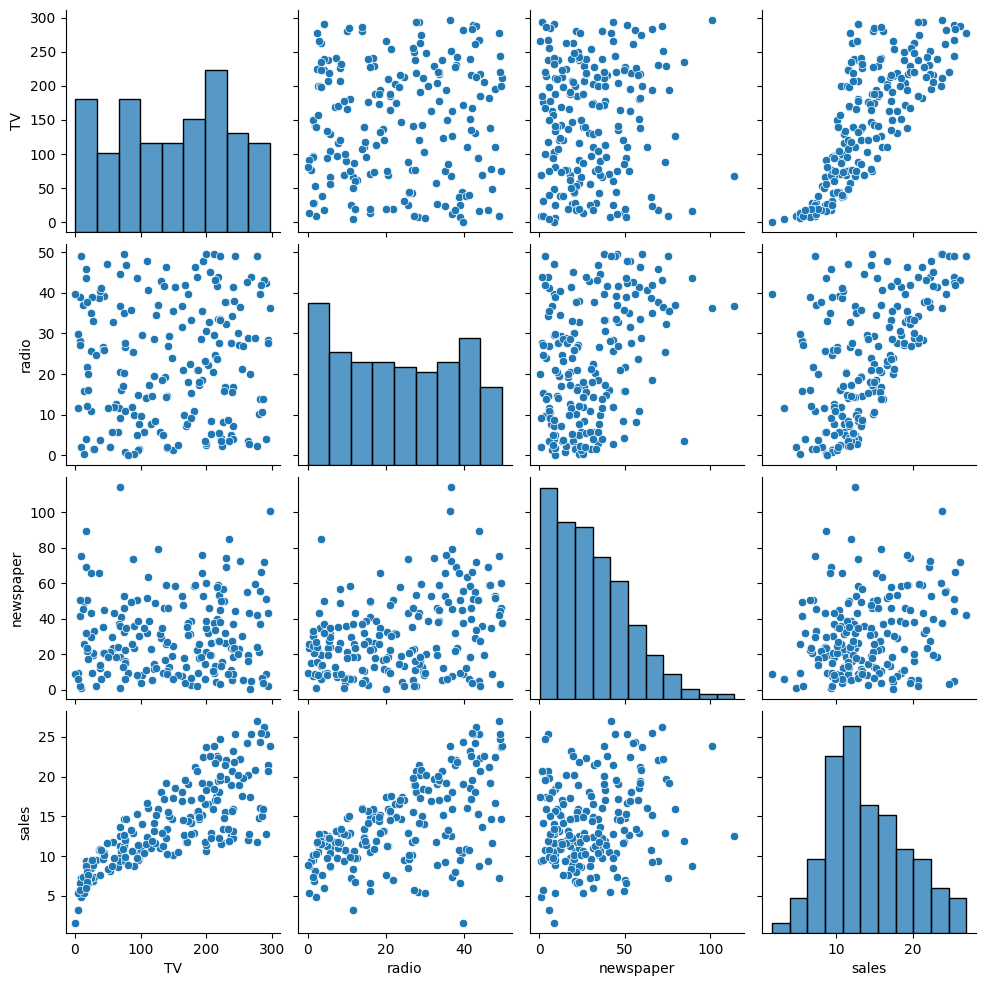

In [462]:
# Visualize relationships between variables
sns.pairplot(ads_data)


In [463]:
ads_data.cov()

,TV,radio,newspaper,sales
TV,7370.949893,69.862492,105.919452,350.390195
radio,69.862492,220.427743,114.496979,44.635688
newspaper,105.919452,114.496979,474.308326,25.941392
sales,350.390195,44.635688,25.941392,27.221853


In [464]:
corr_matrix = np.round(ads_data.corr(), 2)
corr_matrix

,TV,radio,newspaper,sales
TV,1.00,0.05,0.06,0.78
radio,0.05,1.00,0.35,0.58
newspaper,0.06,0.35,1.00,0.23
sales,0.78,0.58,0.23,1.00


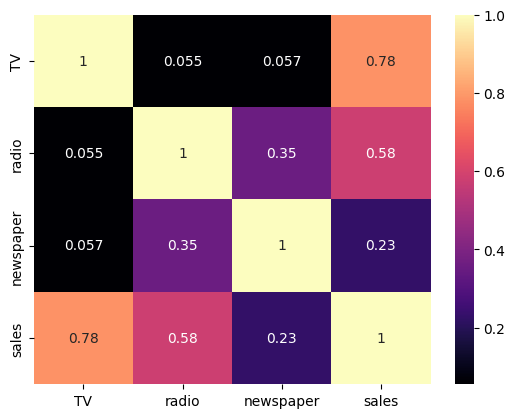

In [465]:
sns.heatmap(data=ads_data.corr(), annot=True, cmap = "magma");

In [466]:
# Set feature (TV ads) and target (sales)
X = ads_data[['TV']]
y = ads_data['sales']

In [467]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [468]:
# Initialize the SGDRegressor model
sgd_reg = SGDRegressor(max_iter=100, penalty=None, alpha=0.001, eta0=0.1, early_stopping=True)

In [469]:
# Scale the features to a range [0, 1]

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [470]:
# Fit the model to the training data
sgd_reg.fit(X_train_scaled, y_train)

SGDRegressor(alpha=0.001, early_stopping=True, eta0=0.1, max_iter=100,
             penalty=None)

In [471]:
# Get the coefficients and intercept of the model
weights = sgd_reg.coef_
bias = sgd_reg.intercept_

In [472]:
# Print the linear regression model equation
print("The linear regression model based on the training data is:")
print(f"predicted_sales = {np.round(weights[0], 3)} * TV + {np.round(bias[0], 3)}")

The linear regression model based on the training data is:
predicted_sales = 12.872 * TV + 7.952


<ipython-input-473-20396a085545>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axes[0].text(0.55,0.15,'$y = %.2f x_1 - %.2f $' % (weights, abs(bias)), fontsize=17, transform=axes[0].transAxes)


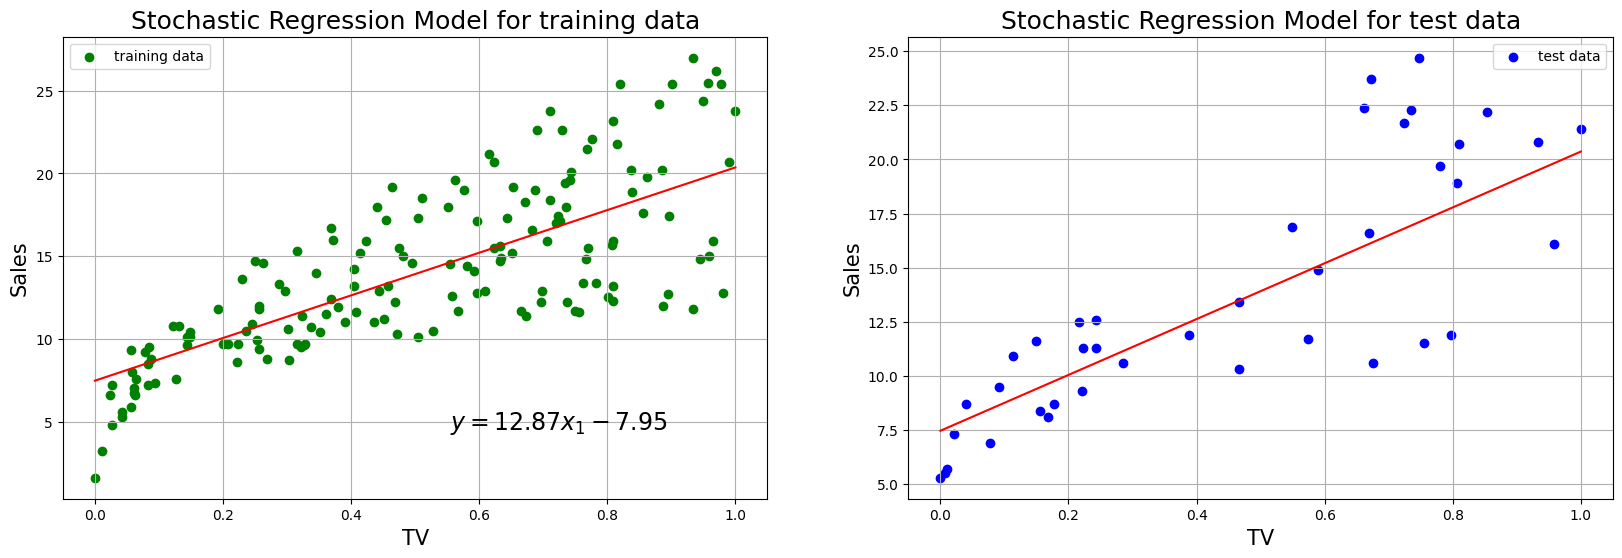

In [473]:
domain = np.linspace(X_train_scaled.min(), X_train_scaled.max(), 100)
domain= domain.reshape(-1,1)

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,6))

axes[0].scatter(X_train_scaled, y_train, color='green', label='training data')
axes[0].plot(domain, sgs.predict(domain), color="red")
axes[0].set_title('Stochastic Regression Model for training data', fontsize=18)
axes[0].set_xlabel('TV', fontsize=15)
axes[0].set_ylabel('Sales', fontsize=15)
axes[0].text(0.55,0.15,'$y = %.2f x_1 - %.2f $' % (weights, abs(bias)), fontsize=17, transform=axes[0].transAxes)
axes[0].legend()
axes[0].grid()

axes[1].scatter(X_test_scaled, y_test, color='blue', label='test data')
axes[1].plot(domain, sgs.predict(domain), color="red")
axes[1].set_title('Stochastic Regression Model for test data', fontsize=18)
axes[1].set_xlabel('TV', fontsize=15)
axes[1].set_ylabel('Sales', fontsize=15)
axes[1].legend()
axes[1].grid()

In [474]:
# Compute RMSE for training and testing datasets
rmse_train = np.sqrt(mean_squared_error(y_train, sgd_reg.predict(X_train_scaled)))
rmse_test = np.sqrt(mean_squared_error(y_test, sgd_reg.predict(X_test_scaled)))


In [475]:
print(f"RMSE on the training data: {rmse_train:.3f}")
print(f"RMSE on the test data: {rmse_test:.3f}")


RMSE on the training data: 3.285
RMSE on the test data: 3.207



### Part 3

Import the data file ```mtcars.csv```. The goal is
to determine two or three continuous numerical variables that can be used to predict mpg
(miles per gallon) using multiple linear regression. You can use ```sklearn``` or custom class; batch GD, SGD, or mini-batch SGD;
and scaling.  

In [476]:
# Import the necessary libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.linear_model import SGDRegressor

In [477]:
# reading the data from the file

mtcars_data = pd.read_csv('mtcars.csv')
mtcars_data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [478]:
# checking data types of the variables, since scaling can be applied only on int and float data types

mtcars_data.dtypes

,0
Unnamed: 0,object
mpg,float64
cyl,int64
disp,float64
hp,int64
drat,float64
wt,float64
qsec,float64
vs,int64
am,int64


In [479]:
# checking for Unnamed column

mtcars_data.columns

Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

In [480]:
# removing the unnamed column

mtcars_data = mtcars_data.loc[:, ~mtcars_data.columns.str.match('Unnamed')]

In [481]:
mtcars_data.shape

(32, 11)

In [482]:
mtcars_data

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [483]:
# finding covariance

mtcars_data.cov().round(2)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,36.32,-9.17,-633.10,-320.73,2.20,-5.12,4.51,2.02,1.80,2.14,-5.36
cyl,-9.17,3.19,199.66,101.93,-0.67,1.37,-1.89,-0.73,-0.47,-0.65,1.52
disp,-633.10,199.66,15360.80,6721.16,-47.06,107.68,-96.05,-44.38,-36.56,-50.80,79.07
hp,-320.73,101.93,6721.16,4700.87,-16.45,44.19,-86.77,-24.99,-8.32,-6.36,83.04
drat,2.20,-0.67,-47.06,-16.45,0.29,-0.37,0.09,0.12,0.19,0.28,-0.08
wt,-5.12,1.37,107.68,44.19,-0.37,0.96,-0.31,-0.27,-0.34,-0.42,0.68
qsec,4.51,-1.89,-96.05,-86.77,0.09,-0.31,3.19,0.67,-0.20,-0.28,-1.89
vs,2.02,-0.73,-44.38,-24.99,0.12,-0.27,0.67,0.25,0.04,0.08,-0.46
am,1.80,-0.47,-36.56,-8.32,0.19,-0.34,-0.20,0.04,0.25,0.29,0.05
gear,2.14,-0.65,-50.80,-6.36,0.28,-0.42,-0.28,0.08,0.29,0.54,0.33


In [484]:
# finding correlation co-efficient

corr_matrix = np.round(mtcars_data.corr(), 2)
corr_matrix

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56,0.39
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13,0.75
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70,-0.09
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58,0.43
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,0.74,-0.23,-0.21,-0.66
vs,0.66,-0.81,-0.71,-0.72,0.44,-0.55,0.74,1.00,0.17,0.21,-0.57
am,0.60,-0.52,-0.59,-0.24,0.71,-0.69,-0.23,0.17,1.00,0.79,0.06
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,0.21,0.79,1.00,0.27


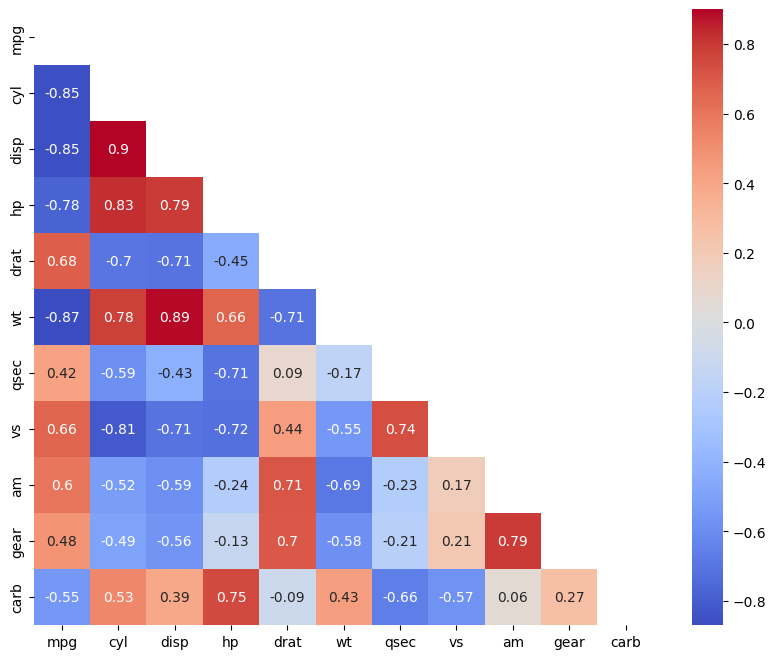

In [485]:
# plotting the correlation for visualisation

plt.figure(figsize=(10,8))
corr_mask = np.triu(np.ones_like(corr_matrix,dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", mask = corr_mask);

In [486]:
# as we can see from the plot, wt (-0.87), cyl (-0.85) and disp (-0.85) have strong relation with mpg (which we are going to predict)
# note that r<= -0.8, imples that it has negative correlation
# so we are taking wt, cyl and disp as independent variables
# mpg as dependent variable

X = mtcars_data[['wt', 'cyl', 'disp']]
y = mtcars_data['mpg']

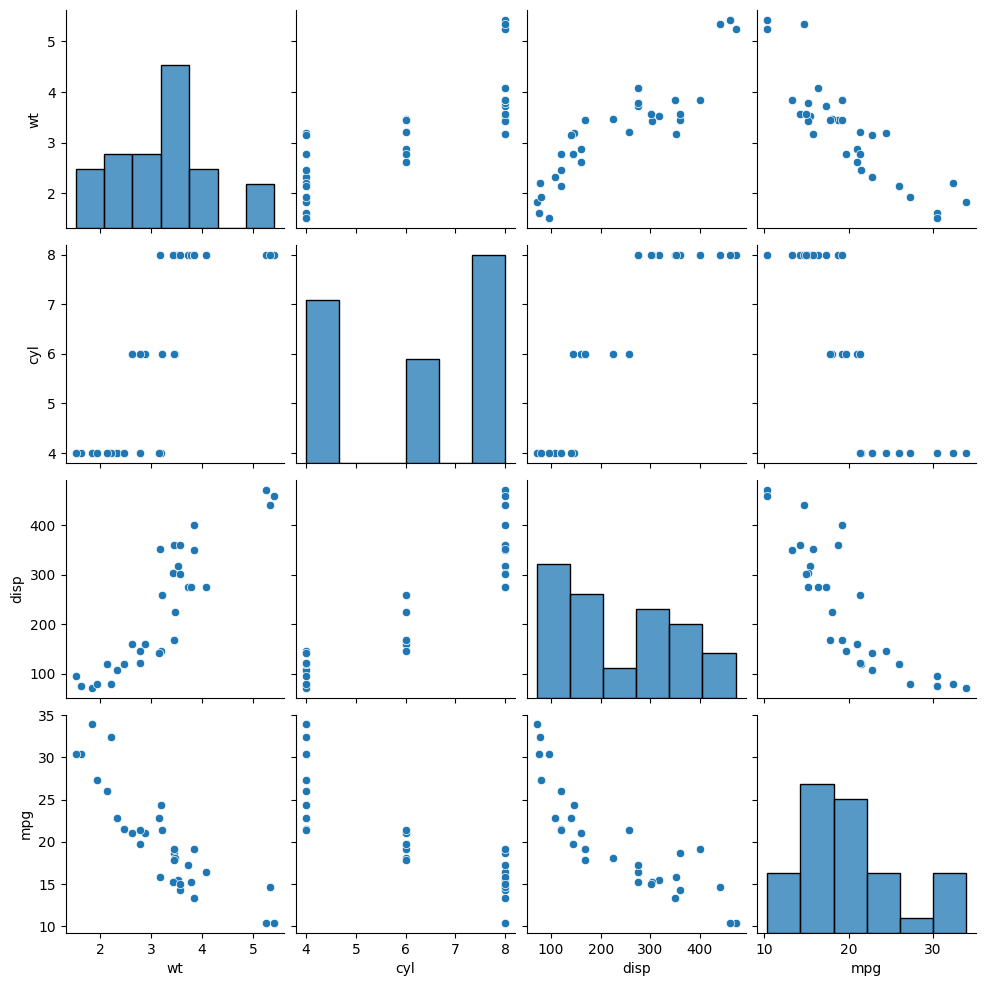

In [487]:
# ploting pairplots of 4 variables

pairplot_data = pd.DataFrame(mtcars_data, columns=["wt", "cyl", "disp", "mpg"])
sns.pairplot(pairplot_data)

We can observe from pairplots that mpg vs wt, mpg vs cyl and mpg vs disp have negative correlation and linear regreesion can be applied for the data. Since the correlation of mpg vs mpg is 1, histogram is plotted

In [488]:
# to check min and max for scaling

X.describe()

,wt,cyl,disp
count,32.000000,32.000000,32.000000
mean,3.217250,6.187500,230.721875
std,0.978457,1.785922,123.938694
min,1.513000,4.000000,71.100000
25%,2.581250,4.000000,120.825000
50%,3.325000,6.000000,196.300000
75%,3.610000,8.000000,326.000000
max,5.424000,8.000000,472.000000


In [489]:
# spliiting that data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [490]:
X_train.count()

,0
wt,22
cyl,22
disp,22


In [491]:
X_test.count()

,0
wt,10
cyl,10
disp,10


In [492]:
# scaling is applied based on the training data after splitting
scaler = MinMaxScaler().fit(X_train)
scaler

MinMaxScaler()

In [493]:
# in Minmax scaler, the range will always between 0 and 1
scaler.feature_range

(0, 1)

In [494]:
# scaling the train and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [495]:
X_train_scaled, X_test_scaled

(array([[0.50287056, 1.        , 0.72062859],
        [1.        , 1.        , 0.9201796 ],
        [0.50808977, 0.5       , 0.38388626],
        [0.59159708, 1.        , 0.51060115],
        [0.66727557, 1.        , 0.51060115],
        [0.6072547 , 1.        , 0.69568471],
        [0.35542797, 0.5       , 0.22175106],
        [0.21059499, 0.        , 0.0920429 ],
        [0.16362213, 0.        , 0.12272387],
        [0.44415449, 0.5       , 0.46620105],
        [0.52374739, 1.        , 0.61586431],
        [0.        , 0.        , 0.0598653 ],
        [0.50156576, 1.        , 0.58094288],
        [0.02661795, 0.        , 0.01147418],
        [0.33063674, 0.        , 0.12446994],
        [0.24843424, 0.        , 0.12222499],
        [0.43763048, 0.        , 0.1885757 ],
        [0.50287056, 0.5       , 0.24070841],
        [0.97520877, 1.        , 1.        ],
        [0.43241127, 1.        , 0.6981791 ],
        [0.08402923, 0.        , 0.        ],
        [0.53679541, 1.        , 0

In [496]:
# using SGD regressor model

SGD_reg = SGDRegressor()
SGD_reg.fit(X_train_scaled, y_train)

SGDRegressor()

In [497]:
w = SGD_reg.coef_
b = SGD_reg.intercept_

w, b

(array([-2.7634466 , -7.08456166, -4.17920151]), array([26.59333595]))

In [498]:
print(f"The linear regression model based on the training data is \n")
print(f"predicted_sales = {np.round(w[0],3)} * drat + {np.round(w[1],3)} * vs + {np.round(w[2],3)} * arm + {np.round(b,3)}")

The linear regression model based on the training data is 

predicted_sales = -2.763 * drat + -7.085 * vs + -4.179 * arm + [26.593]


In [499]:
# calculating Mean sqaure error

mse_train = mean_squared_error(y_train, SGD_reg.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, SGD_reg.predict(X_test_scaled))

print(f"RMSE on the training data: {np.sqrt(mse_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test)}")

RMSE on the training data: 2.7486774328679355

RMSE on the test data: 2.850731597411244


From the above both r2 scores, RMSE the linear regression model with min max scaler performs better than the Stochastic regression model.